In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

In [3]:
path11 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'
path12 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path21 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 NobelpapercontrolsCD.zip'
path22 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 Nobelpapercontrols.zip'

In [4]:
fNobel1 = pd.read_csv(path11)
fControl1 = pd.read_csv(path21)
fNobel2 = pd.read_csv(path12)
fControl2 = pd.read_csv(path22)

In [5]:
fNobel = pd.concat([fNobel1 , fNobel2] , axis = 1)
fControl = pd.concat([fControl1 , fControl2] , axis = 1)

fNobel = fNobel.loc[:, ~fNobel.columns.duplicated()]
fControl = fControl.loc[:, ~fControl.columns.duplicated()]

# Physics

In [18]:
fNobel1 = fNobel[fNobel['Field'] == 'Physics']
fControl1 = fControl[fControl['Field'] == 'Physics']

In [19]:
ff = fNobel1[['cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
ff.columns = ['C','CD', 'DI*', 'sDI','C-CD P', 'DC']

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix1 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix1)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True

In [22]:
ff = fControl1[['cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
ff.columns = ['C','CD', 'DI*', 'sDI','C-CD P', 'DC']

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix2 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix2)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True

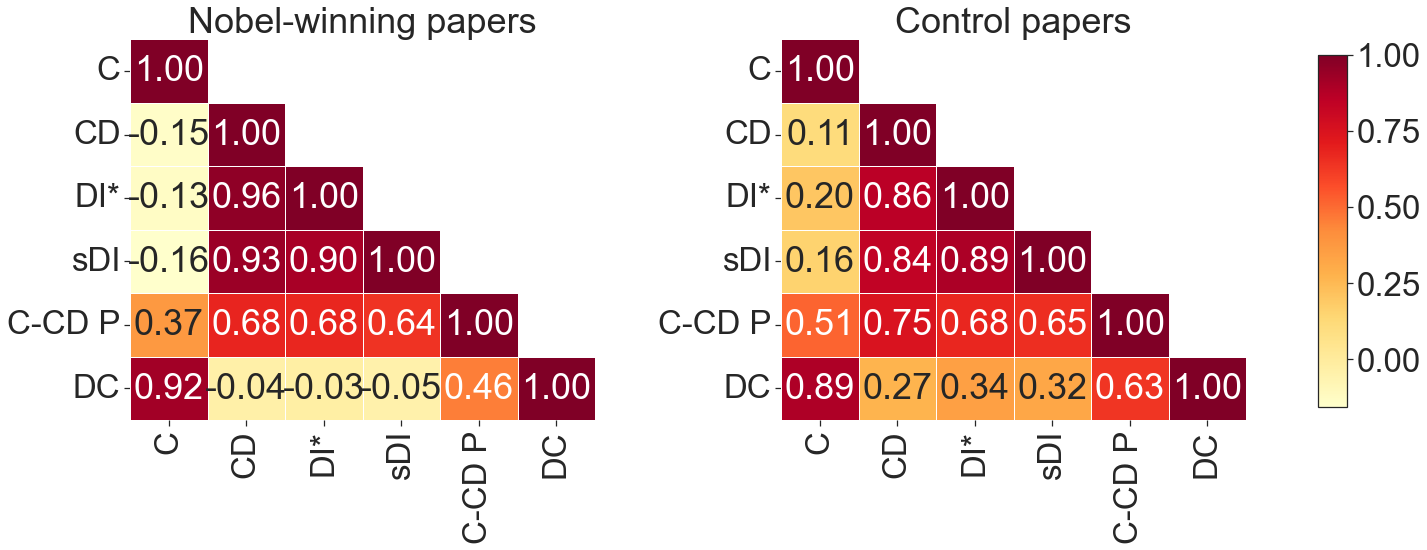

In [25]:
# assuming kendall_matrix1 and kendall_matrix2 are numpy arrays containing the correlation values
vmin = np.min([np.min(kendall_matrix1), np.min(kendall_matrix2)])
vmax = np.max([np.max(kendall_matrix1), np.max(kendall_matrix2)])

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.40,hspace=0)
sns.set(context='notebook', style='ticks', font_scale=3)
# plot heatmap 1 in the first subplot
sns.heatmap(kendall_matrix1, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[0], cbar=False)
axs[0].set_title('Nobel-winning papers')

# plot heatmap 2 in the second subplot without color bar
sns.heatmap(kendall_matrix2, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[1], cbar=False)
axs[1].set_title('Control papers')

# add a shared color bar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].collections[0], cax=cbar_ax)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 4\1.pdf",bbox_inches = 'tight')

# Chemistry

In [27]:
fNobel1 = fNobel[fNobel['Field'] == 'Chemistry']
fControl1 = fControl[fControl['Field'] == 'Chemistry']

In [28]:
ff = fNobel1[['cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
ff.columns = ['C','CD', 'DI*', 'sDI','C-CD P', 'DC']

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix1 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix1)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True

In [29]:
ff = fControl1[['cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
ff.columns = ['C','CD', 'DI*', 'sDI','C-CD P', 'DC']

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix2 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix2)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True

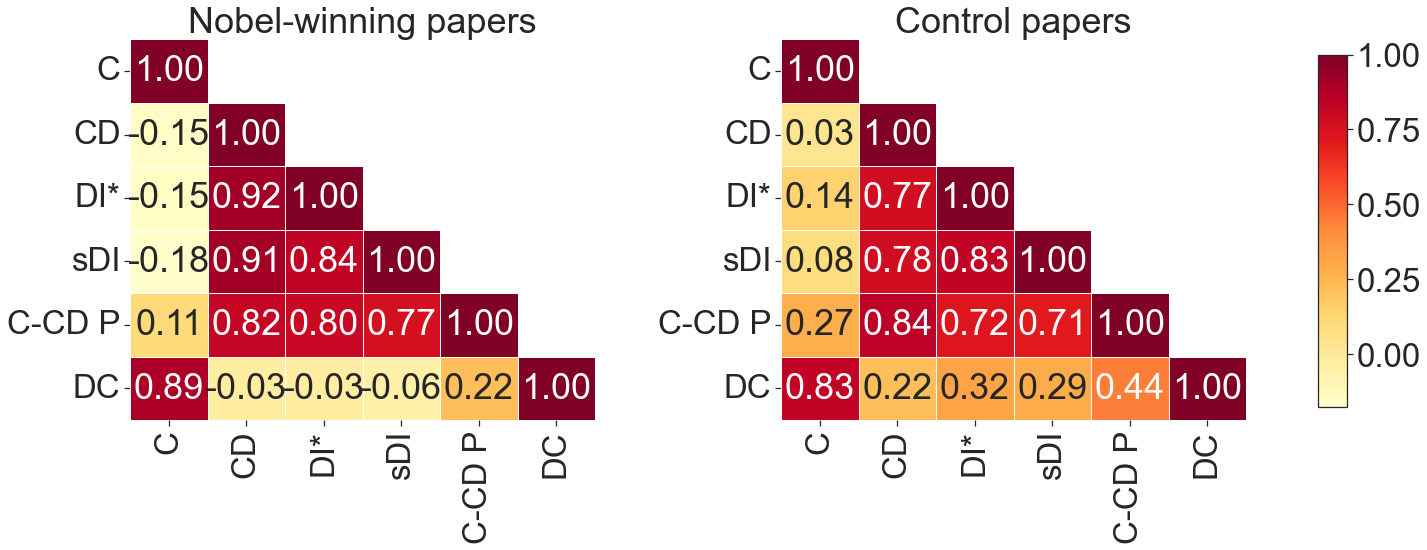

In [30]:
# assuming kendall_matrix1 and kendall_matrix2 are numpy arrays containing the correlation values
vmin = np.min([np.min(kendall_matrix1), np.min(kendall_matrix2)])
vmax = np.max([np.max(kendall_matrix1), np.max(kendall_matrix2)])

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.40,hspace=0)
sns.set(context='notebook', style='ticks', font_scale=3)
# plot heatmap 1 in the first subplot
sns.heatmap(kendall_matrix1, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[0], cbar=False)
axs[0].set_title('Nobel-winning papers')

# plot heatmap 2 in the second subplot without color bar
sns.heatmap(kendall_matrix2, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[1], cbar=False)
axs[1].set_title('Control papers')

# add a shared color bar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].collections[0], cax=cbar_ax)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 4\2.pdf",bbox_inches = 'tight')

# Medicine

In [35]:
fNobel1 = fNobel[fNobel['Field'] == 'Medicine'].dropna()
fControl1 = fControl[fControl['Field'] == 'Medicine'].dropna()

In [36]:
ff = fNobel1[['cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
ff.columns = ['C','CD', 'DI*', 'sDI','C-CD P', 'DC']

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix1 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix1)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True

In [37]:
ff = fControl1[['cit','CD', 'DIsharp', 'DIeasy','C-CD P', 'ni']]
ff.columns = ['C','CD', 'DI*', 'sDI','C-CD P', 'DC']

lenn = len(ff.columns)
kendalltau_matrix = np.zeros([lenn,lenn])
for i in range(lenn):
    for j in range(lenn):
        kendalltau_matrix[i,j] = scipy.stats.kendalltau(ff.iloc[:,i] , ff.iloc[:,j]).correlation
kendall_matrix2 = pd.DataFrame(kendalltau_matrix , index = ff.columns , columns = ff.columns)

col_name=ff.columns.values
mask=np.zeros_like(kendall_matrix2)
for i in range(1,len(mask)):
    for j in range(0,i):
        mask[j][i]=True

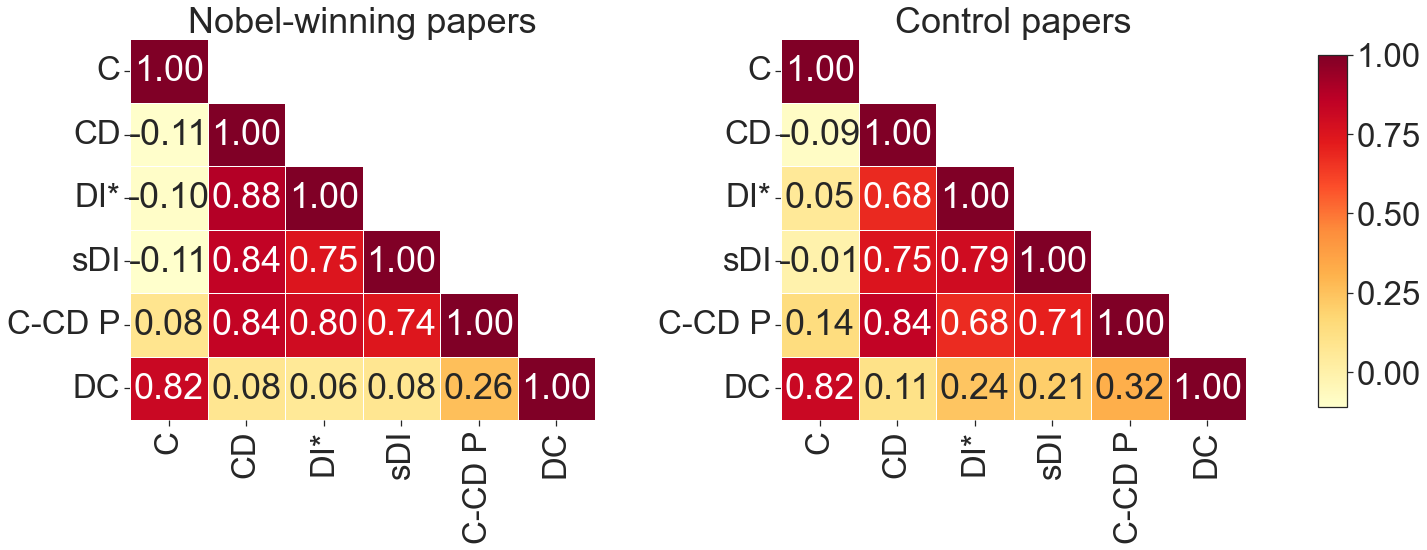

In [38]:
# assuming kendall_matrix1 and kendall_matrix2 are numpy arrays containing the correlation values
vmin = np.min([np.min(kendall_matrix1), np.min(kendall_matrix2)])
vmax = np.max([np.max(kendall_matrix1), np.max(kendall_matrix2)])

# create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.40,hspace=0)
sns.set(context='notebook', style='ticks', font_scale=3)
# plot heatmap 1 in the first subplot
sns.heatmap(kendall_matrix1, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[0], cbar=False)
axs[0].set_title('Nobel-winning papers')

# plot heatmap 2 in the second subplot without color bar
sns.heatmap(kendall_matrix2, annot=True, mask=mask, xticklabels=col_name, yticklabels=col_name, 
            fmt=".2f", linewidth=.5, cmap="YlOrRd", vmin=vmin, vmax=vmax, ax=axs[1], cbar=False)
axs[1].set_title('Control papers')

# add a shared color bar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(axs[0].collections[0], cax=cbar_ax)

plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 4\3.pdf",bbox_inches = 'tight')